In [1]:
import pandas as pd

In [2]:
#.plot() method this creates a line chart by def, using the row index as the x-axis and plotting each numerical column as a seperate series on the y-axis

In [3]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

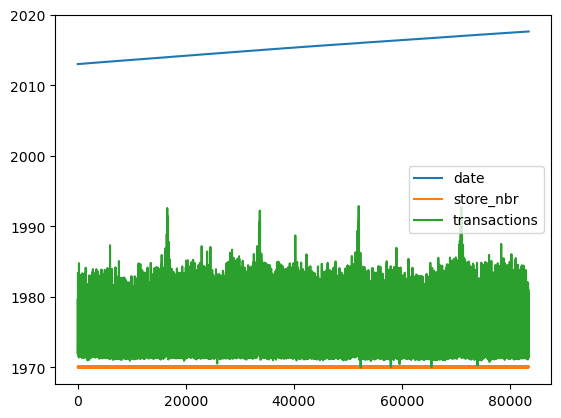

In [4]:
transactions.plot()

<Axes: xlabel='date'>

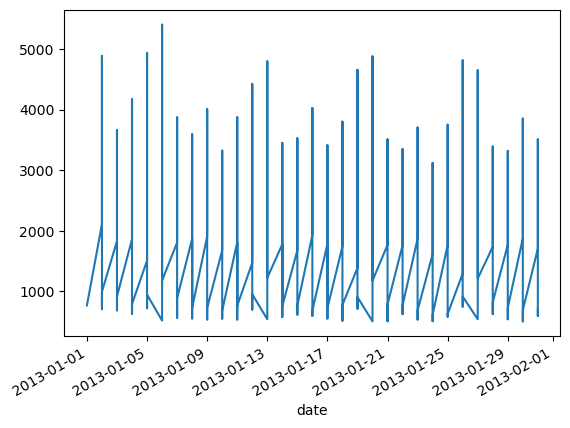

In [5]:
transactions.set_index("date").loc["2013-01", "transactions"].plot()

<Axes: xlabel='date'>

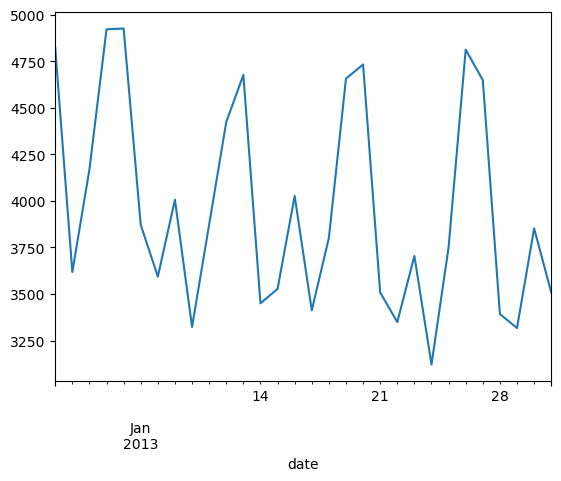

In [6]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01", "transactions"].plot()

In [7]:
transactions_44 = transactions.loc[transactions["store_nbr"] == 44, ["date", "transactions"]]

transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

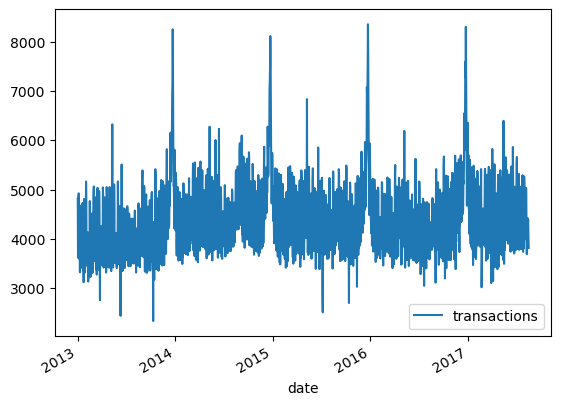

In [8]:
transactions_44.plot(x="date", y="transactions") #.set_index("date").plot()

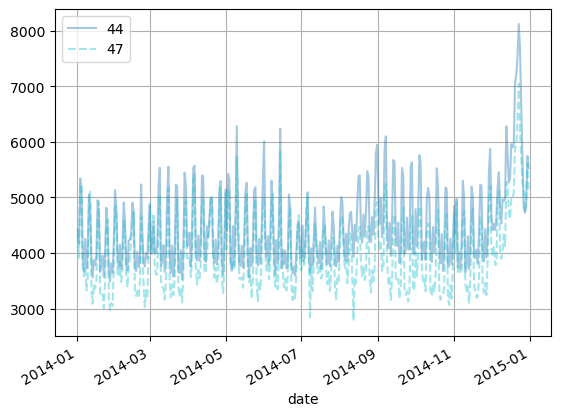

In [9]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns= "store_nbr")
 .droplevel(0, axis=1)
 .plot(#color="#62A800", "orange"],
     cmap='tab10',#'viridis',
     alpha=.4,
     style=["-", "--"],
     grid=True,
      )) .legend(loc="upper left") #legend(bbox_to_anchor=(1,1))

<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

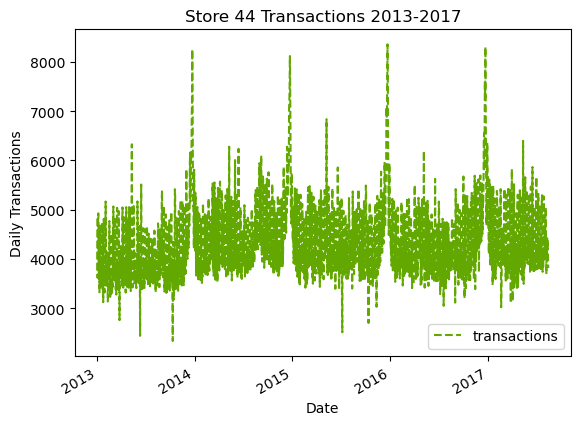

In [10]:
transactions_44.set_index("date").plot(
    title= "Store 44 Transactions 2013-2017",
    xlabel= 'Date',
    ylabel= "Daily Transactions",
    color="#62A800",
    style=["--"],
) #style '-' solid, '--' dashed, '-.' dash dot, '..' dotted

In [11]:
#"legend" .plot() argument lets you add or remove the legend
#"legend=False" remove thelegend
#"legend(loc="best")" puts the best place      
#legend(loc="center left")

In [12]:
#import seaborn as sns
import matplotlib
matplotlib.style.use("fivethirtyeight")
#sns.set_style("darkgrid")

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

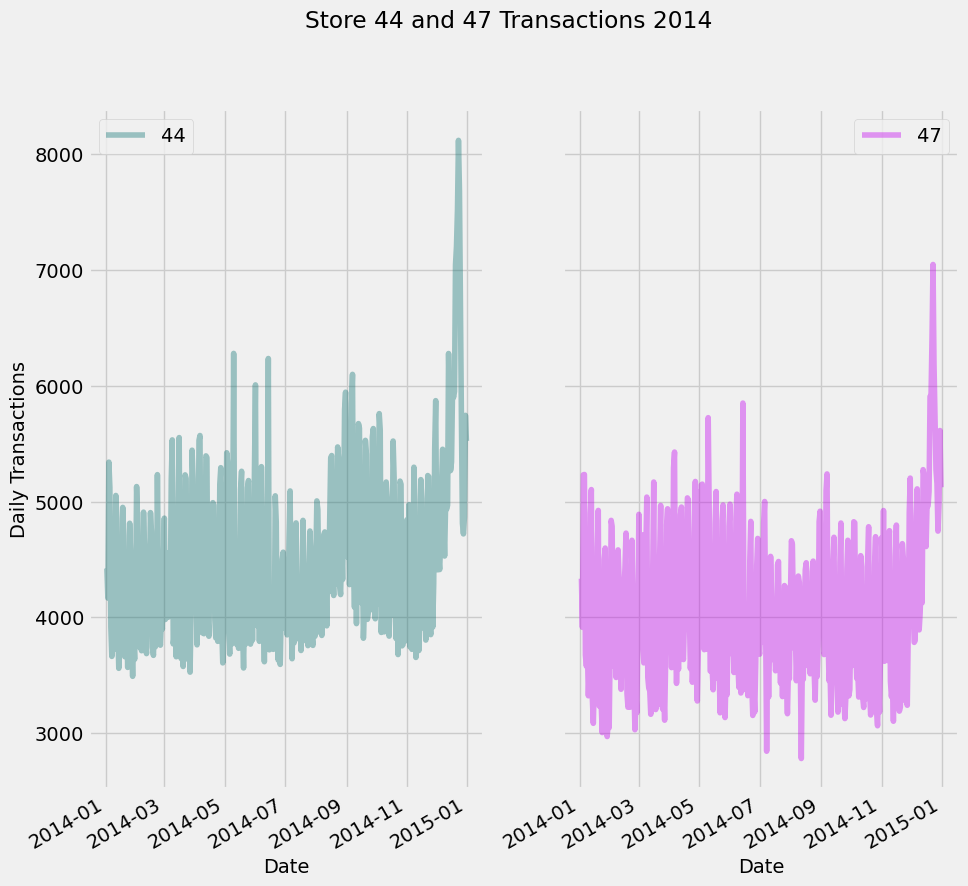

In [41]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot(index="date", columns= "store_nbr")
 .droplevel(0, axis=1)
 .plot(#color="#62A800", "orange"],
     title="Store 44 and 47 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c507f0"],
#      cmap='tab10',#'viridis',
     alpha=.4,
     subplots=True,
     layout=(1, 2),
     sharey=True,
     figsize=(10, 10)
#      style=["-", "--"],
#      grid=True,
       )) #.legend(loc="upper left") #legend(bbox_to_anchor=(1,1))

In [14]:
#subplots create a separate chart for each series
#sharey & sharex let you consistent axess across the subplot
#layout lets you specify the rows and columns for the subplots
#title can map a lit of specified titles to each subplot
#figsize adjust the size of thhe plot or subplots

In [15]:
#plot.bar(rot=45) dikdörtgen sütunlu bar
#plat.barh dikdörtgen sütünlu yanlamasına bar

In [16]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: ylabel='store_nbr'>

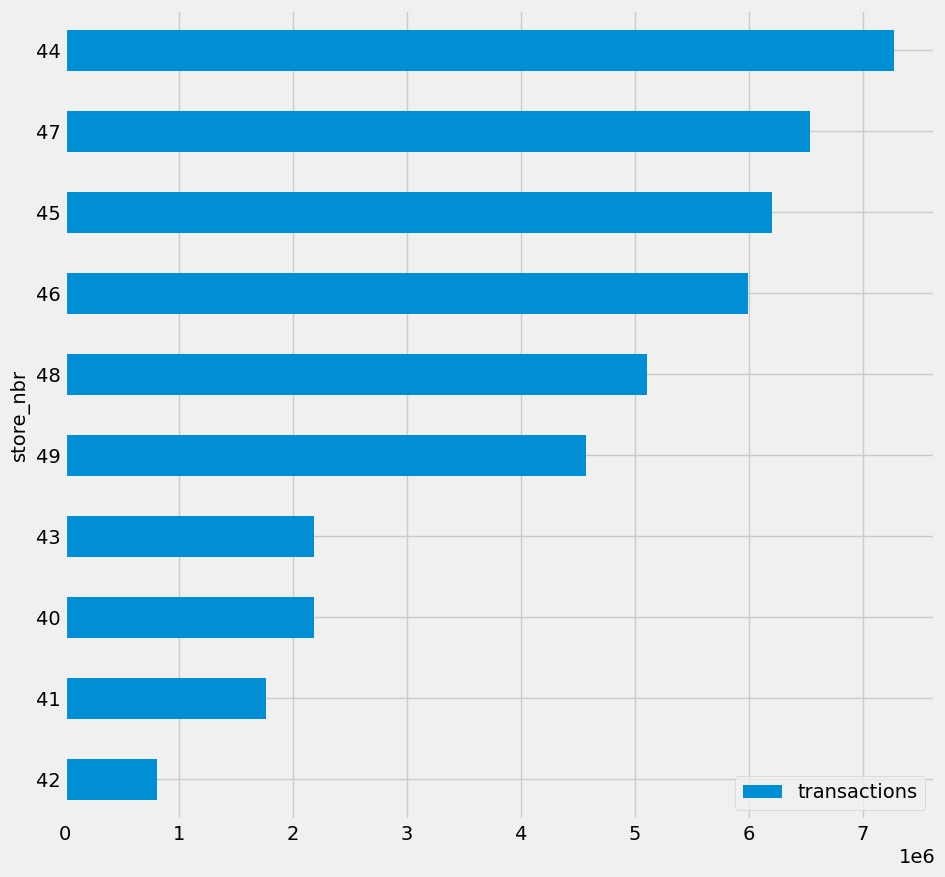

In [17]:
store_40s = list(range(40, 50))
(
transactions
    .query("store_nbr in @store_40s")
    .groupby(["store_nbr"])
    .agg({"transactions": "sum"})
    .sort_values(by="transactions")
    .plot.barh(figsize=(10, 10))
)

In [18]:
#by_family = grouped charts
#stacked=True when plotting multiple series to create a stacked bar chart


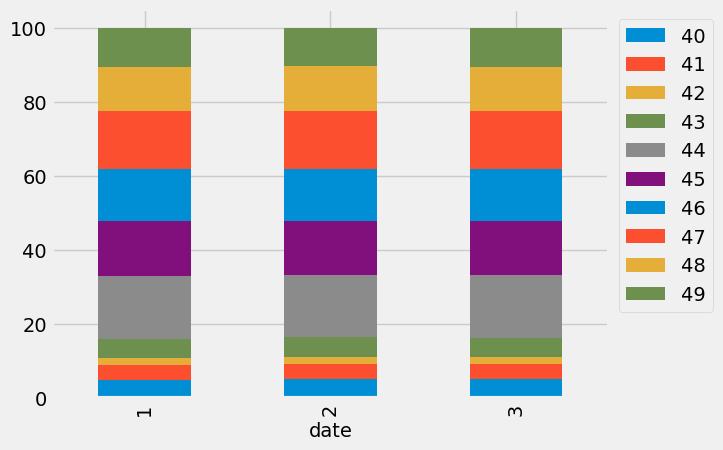

In [23]:
store_40s = list(range(40, 50))
(
transactions
    .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
    .pivot_table(index=transactions["date"].dt.month,
                 columns= transactions["store_nbr"],
                 values="transactions",
                 aggfunc="sum").apply(lambda x: x * 100 / sum(x), axis=1) 
.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))
)

In [ ]:
#pie charts are used for showing composition with categorical data -not recc
#scatterplots are used for showing the relationship between numerical series

In [24]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


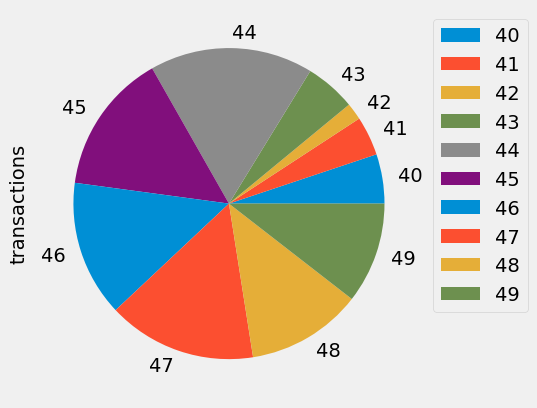

In [27]:
(transactions
    .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
    .groupby("store_nbr")
    .agg({"transactions": "sum"})
    .plot.pie(y="transactions")
).legend(bbox_to_anchor=(1, 1))

<Axes: xlabel='44', ylabel='47'>

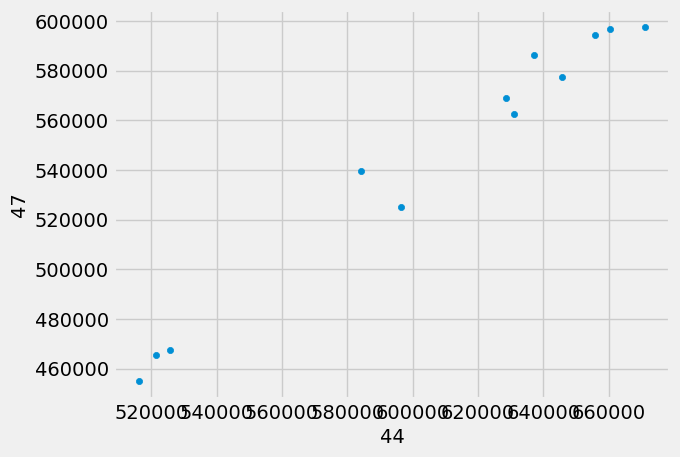

In [35]:
(transactions.query("store_nbr in @store_40s")
.pivot_table(index=transactions["date"].dt.month,
           columns="store_nbr",
           values="transactions",
           aggfunc="sum")
.plot.scatter(x=44, y=47)
)

In [ ]:
#histograms are used for showing the distribution of numerical series #plot.hist
#it divides the date in "bins" and plots the frequency of values that fall into each bin as bars
#alpha=0.4 sets the transparency

<Axes: ylabel='Frequency'>

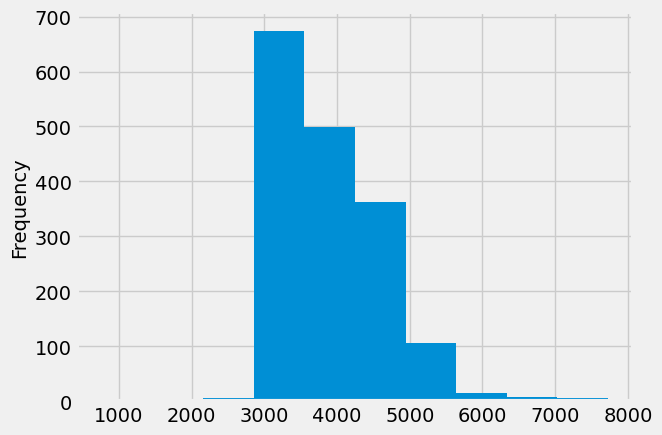

In [39]:
transactions.loc[transactions["store_nbr"] == 47, "transactions"].plot.hist()

In [ ]:
#save plots as images with the .figure.savefig()